In [118]:
%matplotlib ipympl

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import circmean, circvar
from matplotlib.animation import FuncAnimation

import seaborn as sns

from matplotlib import rc
import yaml
import os

# equivalent to rcParams['animation.html'] = 'html5'
rc('animation', html='html5') # conda create -n newenv -c conda-forge ffmpeg


with open("cal-settings.yml", 'r') as file:
    vars = yaml.safe_load(file)
    RX_TX_SAME_CHANNEL = vars["RX_TX_SAME_CHANNEL"]


print("Cable connections")
if RX_TX_SAME_CHANNEL:
    REF_RX_CH = FREE_TX_CH = 0
    LOOPBACK_RX_CH = LOOPBACK_TX_CH = 1
    print("\nPLL REF-->CH0 RX\nCH1 TX-->CH1 RX\nCH0 TX -->")
else:
    LOOPBACK_RX_CH = FREE_TX_CH = 0
    REF_RX_CH = LOOPBACK_TX_CH = 1
    print("\nPLL REF-->CH1 RX\nCH1 TX-->CH0 RX\nCH0 TX -->")
    

Cable connections

PLL REF-->CH0 RX
CH1 TX-->CH1 RX
CH0 TX -->


In [119]:
timestamp = "20240821080246"  # with 16-port splitter: "20240819131041"

usrp1_file = f'data_T03_{timestamp}.txt'
usrp2_file = f'data_T04_{timestamp}.txt'

In [120]:
fields = ["meas_id", "hostname", "meas_type",
          "tx_ch0", "tx_ch1", "rx_ch0", "rx_ch1", "_0", "_1", '_','']

df1 = pd.read_csv(usrp1_file,
                  names=fields, header=None, sep=';')

df2 = pd.read_csv(usrp2_file,
                  names=fields, header=None, sep=';')


df1 = df1[f"rx_ch{REF_RX_CH}"].to_numpy()
df2 = df2[f"rx_ch{REF_RX_CH}"].to_numpy()

print(np.rad2deg(df1))

diff = np.rad2deg(np.angle(np.exp(1j*(df1-df2))))

[138.28772406 182.11448048  44.556676     2.39625503 359.14490019
 240.99246576 149.34768881  90.02589616  60.54503463  18.56647734
 138.32221612 249.9738313  182.26414279  90.02378767  44.54084862
  11.57191801 193.45986416  11.38484557 330.69896086  51.89618514
 295.80844383 339.38259462 134.8846527   60.98276865   6.60863364
  53.16514342 183.99001199  21.11574991 183.94058865 192.99882794
 295.26929627 322.87816144 323.16601544  52.62111427 278.36736217
 286.70057494 331.43176242 142.28095342 287.81612376 151.91328496
 241.52414767 234.80826872 140.8271876  241.80406048 142.78011998
  20.37457228 295.83993932 340.76487248 103.64795628 243.94017892
 184.56964474  64.83762297 304.63524254 339.92810773  61.9236914
 243.8468269  302.38288816 134.88592466 259.72841484 203.38930296
 103.8830294   44.56225088 104.42116282  19.74868063  12.20653351
 288.06230081 332.23335903 102.8710427   67.00146684 330.57945906
 193.58622427 142.82488517  53.28890231 251.95790393 279.027845
 330.07408163

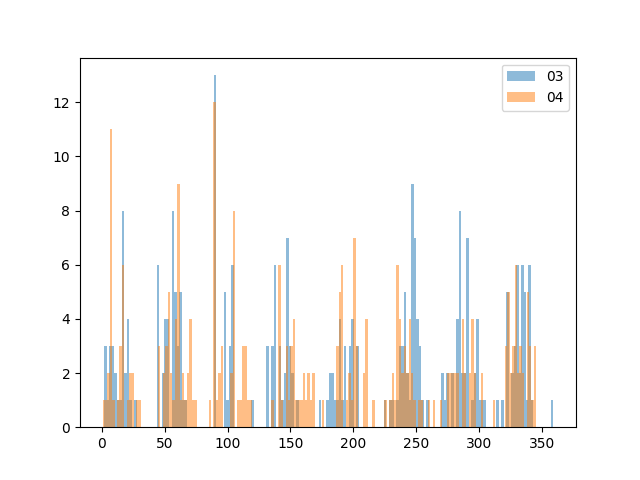

In [121]:
plt.figure()
bins = 180
plt.hist(
    np.rad2deg(df1[:]), bins=bins, label="03", alpha=0.5
)  # arguments are passed to np.histogram
plt.hist(
     np.rad2deg(df2[:]), bins=bins, label="04", alpha=0.5
)  # arguments are passed to np.histogram
plt.legend()
plt.show()

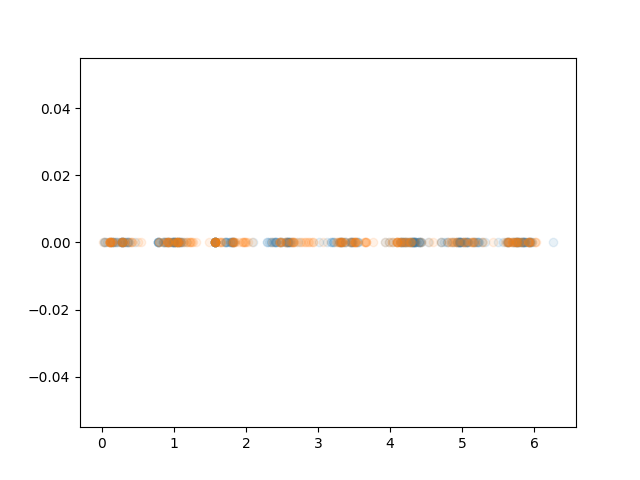

In [122]:
plt.figure()
plt.scatter(
    df1,
    np.zeros_like(df1),
    alpha=0.1,
    label="03",
)  # arguments are passed to np.histogram
plt.scatter(
    df2,
    np.zeros_like(df2),
    alpha=0.1,
    label="04",
)
plt.show()

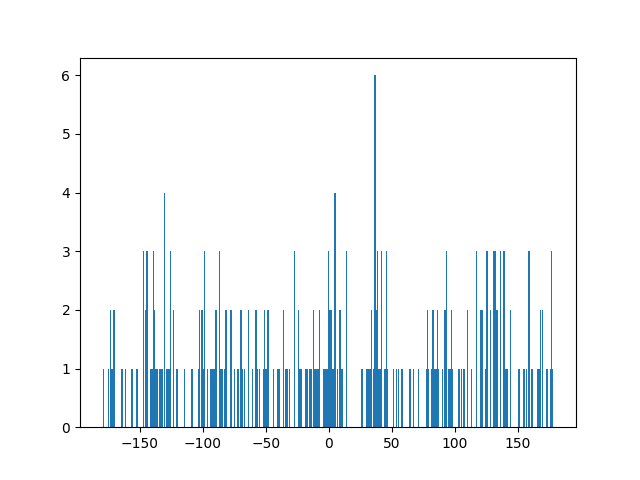

In [123]:
plt.figure()
plt.hist(diff, bins=360)  # arguments are passed to np.histogram
plt.show()

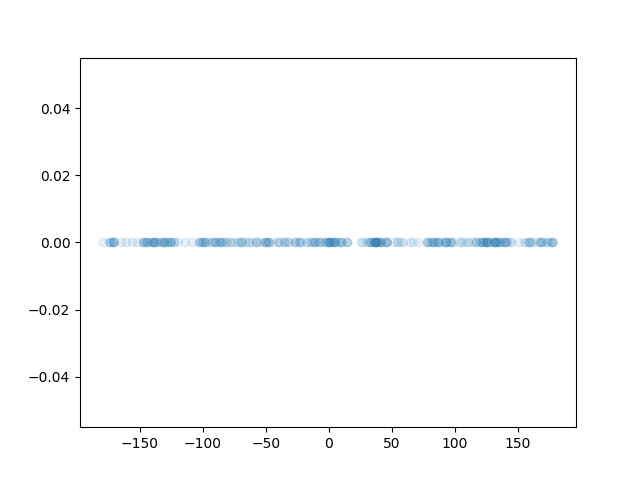

In [124]:
plt.figure()
plt.scatter(
    diff, np.zeros_like(diff), alpha=0.1
)  # arguments are passed to np.histogram
plt.show()